In [1]:
# this notebook performs PCA 
import multiprocessing
print "cpu: ", multiprocessing.cpu_count()
print 'active', multiprocessing.active_children()

cpu:  16
active []


In [2]:
import twx
import pandas as pd
import numpy as np
from numpy import linalg as LA
%pylab inline
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [35]:

"""
this cell runs pca for our universe of stocks
run the function definition cell below first !

output in the format of a tuple of (eigen_value, eigen_vector), where eigen_value is a floating point number
and eigen_vector is a np.array of size = dimension of the universe of stocks
example:

[(4.810366252388185, 
array([0.05538328, 0.29347463, 0.32664834, 0.2872861 , 0.29960184,
       0.29329658, 0.27441429, 0.268705  , 0.33613716, 0.18719918,
       0.23425907, 0.32685361, 0.29755814]))),
       
(0.8317740364515852, 
array([-0.15387162, -0.17651691,  0.09045863,  0.49494666, -0.12290679,
        0.24638472, -0.08672481, -0.43141257, -0.09895669,  0.57551152,
       -0.25734478,  0.04109247, -0.11679029])))]
       
would be a list of two eigen pairs



"""

# define parameters for wrappers

top_n = 15 # top 15 market cap tech tickers to choose from
filename = './companylist.csv'
pools = get_tech_tickers(filename, top_n)
pools.remove('GOOG')
dates = ['20150102','20170103','20170104']
# dates = ['20170407']
start_time = '9am'
end_time = '4pm'
mtype = 'T'
group = 'directs'
align_by_sec_interval_list = [1,5,10,20,30,60,120]
# align_by_sec_interval_list = [5,25,60]
output_pairs = False
thre = 0.65

# to use
if __name__ == '__main__':
    res = {}
    for date in dates:
        res[date] = {}
        for align_by_sec_interval in align_by_sec_interval_list:
            print '\n\n'
            print 'pulling data on date: ', date, 'with align time interval of: ', align_by_sec_interval
            df = get_pool_data(pools, date, group, start_time, end_time, mtype, align_by_sec_interval)
            eig_pair = pca(df, output_pairs = output_pairs, thre = thre)
            res[date][align_by_sec_interval] = eig_pair
            with open('pca_res.txt','a') as f:
                f.write(str(date) + ' ' + str(align_by_sec_interval) + ' seconds ' + \
                        'eigen_pairs: \n' + str(eig_pair) + '\n' )
    with open('pca_res.txt','a') as f:
        f.write('\n\n\nAll of the results are: \n\n')
        f.write(str(res))




pulling data on date:  20150102 with align time interval of:  1
Aligning by time interval: 1 seconds
getting data from: AAPL
getting data from: MSFT
getting data from: GOOGL
getting data from: FB
getting data from: INTC
getting data from: CSCO
getting data from: NVDA
getting data from: ADBE
getting data from: TXN
getting data from: AVGO
getting data from: QCOM
getting data from: MU
getting data from: BIDU
getting data from: AABA
Ticker not found in the database!

merge complete.

[(2.256428322968869, array([0.15988328, 0.28468534, 0.35356584, 0.22083935, 0.31313216,
       0.25623365, 0.11138879, 0.23825971, 0.28508223, 0.34774583,
       0.27529313, 0.34384984, 0.30085234])), (1.297157444123453, array([-0.01070767, -0.35588322,  0.14596745,  0.01740269,  0.34480685,
        0.46384022, -0.5948147 , -0.32044937, -0.1967961 ,  0.01669318,
       -0.10078378,  0.10833346,  0.01379886])), (0.9743365272484568, array([-0.92035925,  0.14105019,  0.1041209 , -0.23745856, -0.03108281,
     

getting data from: MSFT
getting data from: GOOGL
getting data from: FB
getting data from: INTC
getting data from: CSCO
getting data from: NVDA
getting data from: ADBE
getting data from: TXN
getting data from: AVGO
getting data from: QCOM
getting data from: MU
getting data from: BIDU
getting data from: AABA
Ticker not found in the database!

merge complete.

[(6.116380915951728, array([0.22763177, 0.30663247, 0.30530572, 0.2691741 , 0.30743995,
       0.28633982, 0.23905371, 0.29964278, 0.32429769, 0.26814013,
       0.25585568, 0.256952  , 0.23769132])), (1.066693301644023, array([-0.5603054 , -0.1528235 ,  0.21572266,  0.18697873,  0.2641163 ,
        0.37424537, -0.39379904,  0.06956893,  0.23475514, -0.27700446,
       -0.25717934,  0.09252769, -0.07019236])), (0.8670869800143008, array([-0.12558498, -0.37802121,  0.10522656, -0.38215725, -0.28666486,
        0.147343  ,  0.04229291,  0.34561985, -0.16189649,  0.2388796 ,
       -0.20221251,  0.24583472,  0.52391275])), (0.822801525

getting data from: MSFT
getting data from: GOOGL
getting data from: FB
getting data from: INTC
getting data from: CSCO
getting data from: NVDA
getting data from: ADBE
getting data from: TXN
getting data from: AVGO
getting data from: QCOM
getting data from: MU
getting data from: BIDU
getting data from: AABA
Ticker not found in the database!

merge complete.

[(5.003558040459268, array([0.19193009, 0.28605628, 0.34511514, 0.23143899, 0.32767082,
       0.29406792, 0.22238277, 0.27174124, 0.32171696, 0.29549668,
       0.22271687, 0.31594101, 0.22645765])), (1.414575397890859, array([-0.27548172,  0.13350283,  0.04802189, -0.15064284,  0.20901857,
        0.13469953, -0.40201605,  0.45111104,  0.3230148 , -0.18156325,
       -0.38250614,  0.06067138, -0.40870638])), (1.0597320240212595, array([ 0.23380591, -0.32870282, -0.13682765, -0.49125581, -0.12983833,
        0.27134627, -0.4019297 ,  0.22463519, -0.15900181,  0.27463011,
        0.30629621,  0.27375136,  0.0726601 ])), (0.825504811

getting data from: MSFT
getting data from: GOOGL
getting data from: FB
getting data from: INTC
getting data from: CSCO
getting data from: NVDA
getting data from: ADBE
getting data from: TXN
getting data from: AVGO
getting data from: QCOM
getting data from: MU
getting data from: BIDU
getting data from: AABA
Ticker not found in the database!

merge complete.

[(4.297194266985981, array([0.10311074, 0.29071126, 0.32719654, 0.29717276, 0.30074997,
       0.27911956, 0.26101861, 0.26029811, 0.34895519, 0.2385298 ,
       0.27069715, 0.26822396, 0.28522726])), (1.223388934337593, array([ 0.51575062, -0.24809665,  0.10395464, -0.16407354, -0.29601246,
        0.16283362, -0.41328688,  0.37726923,  0.0156509 ,  0.39052541,
        0.12308124, -0.19694699,  0.02746299])), (1.0238119387613929, array([-0.32882099,  0.29384663,  0.28121583, -0.20871998,  0.02292389,
        0.19749775, -0.0304999 ,  0.44805089,  0.17538739, -0.22033983,
       -0.30447458, -0.493577  , -0.16137047])), (0.904192608

In [108]:
# this cell is for getting the most correlated pairs of stocks !

# run the function definition cell below first !
# define parameters for wrappers

top_n = 15 # top 100 market cap tech tickers to choose from
filename = './companylist.csv'
# pools = get_tech_tickers(filename, top_n)
pools = ['AAPL', 'QCOM']
# pools.remove('GOOG')
# dates = ['20150102','20170103','20170104']
# '20170407','20170410','20170411','20170412', '20170413', 
dates = ['20170501', '20170502','20170503','20170504','20170505']
# '20170407'
start_time = '9am'
end_time = '4pm'
mtype = 'T'
group = 'directs'
align_by_sec_interval_list = [60]
# align_by_sec_interval_list = [60,65]
output_pairs = True

# to use
if __name__ == '__main__':
    res = {}
    best_pair = ['0']*2 # (corr, corr_pair)
    for date in dates:
        res[date] = {}
        for align_by_sec_interval in align_by_sec_interval_list:
            print '\n\n'
            print 'pulling data on date: ', date, 'with align time interval of: ', align_by_sec_interval
            df = get_pool_data(pools, date, group, start_time, end_time, mtype, align_by_sec_interval)
#             print df
            pairs = pca(df, output_pairs = True)
            print pairs.to_string()
#             with open('pairs_res0605afternoon.txt','a') as f:
#                 f.write(str(date)+str(align_by_sec_interval))
#                 f.write(pairs.to_string())
            print 'optimal result for current setting is: \n\n', pairs
            res[date][align_by_sec_interval] = pairs
            with open('pairs_res0603.txt','a') as f:
                f.write(str(date) + ' ' + str(align_by_sec_interval) + ' seconds ' + str(pairs) + '\n')
            if float(pairs[0]) > float(best_pair[0]):
                best_pair[0] = pairs[0]
                best_pair[1] = pairs
    print best_pair
    print res
    with open('pairs_res0604.txt','a') as f:
        f.write('\n\n\n best pair is ' + str(best_pair))
        f.write('\n\n\n final results are: ' + str(res))





pulling data on date:  20170501 with align time interval of:  60
Aligning by time interval: 60 seconds
getting data from: AAPL
getting data from: QCOM

merge complete.

AAPL_log_ret  QCOM_log_ret    0.035818
optimal result for current setting is: 

AAPL_log_ret  QCOM_log_ret    0.035818
dtype: float64



pulling data on date:  20170502 with align time interval of:  60
Aligning by time interval: 60 seconds
getting data from: AAPL
getting data from: QCOM

merge complete.

AAPL_log_ret  QCOM_log_ret    0.151721
optimal result for current setting is: 

AAPL_log_ret  QCOM_log_ret    0.151721
dtype: float64



pulling data on date:  20170503 with align time interval of:  60
Aligning by time interval: 60 seconds
getting data from: AAPL
getting data from: QCOM

merge complete.

AAPL_log_ret  QCOM_log_ret    0.028126
optimal result for current setting is: 

AAPL_log_ret  QCOM_log_ret    0.028126
dtype: float64



pulling data on date:  20170504 with align time interval of:  60
Aligning by ti

[('20170407', 0.701826), ('20170410', 0.421288), ('20170411', 0.386065), ('20170412', 0.302192), ('20170413', 0.177802), ('20170417', 0.211071), ('20170418', 0.266899), ('20170419', 0.229156), ('20170420', 0.089029), ('20170421', 0.41426), ('20170424', 0.329515), ('20170425', 0.289259), ('20170426', 0.491594), ('20170427', 0.193785), ('20170428', 0.283725), ('20170501', 0.035818), ('20170502', 0.151721), ('20170503', 0.028126), ('20170504', 0.273585), ('20170505', 0.289691)]


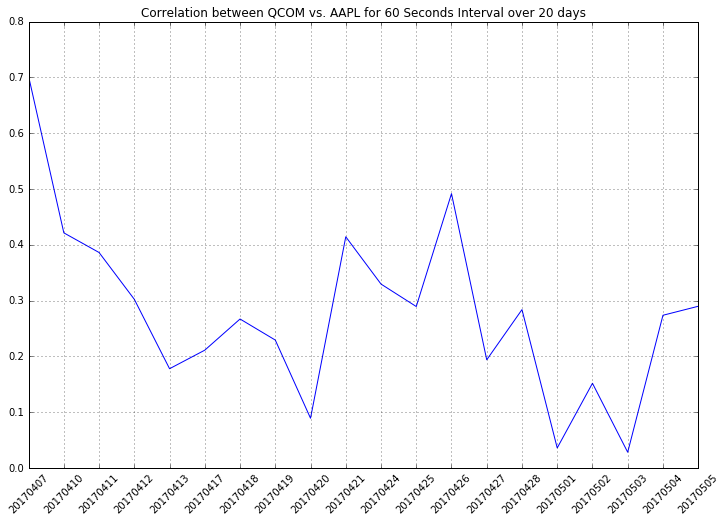

In [110]:
# 60 second interval : 

data = {
'20170407': 0.701826, 
'20170410': 0.421288,
'20170411': 0.386065,
'20170412': 0.302192,
'20170413': 0.177802,
'20170417': 0.211071,
'20170418': 0.266899,
'20170419': 0.229156,
'20170420': 0.089029,
'20170421': 0.41426,
'20170424': 0.329515,
'20170425': 0.289259,
'20170426': 0.491594,
'20170427': 0.193785,
'20170428': 0.283725,
'20170501': 0.035818,
'20170502': 0.151721,
'20170503': 0.028126,
'20170504': 0.273585,
'20170505': 0.289691,
}

import sys

def asint(s):
    try: return int(s), ''
    except ValueError: return sys.maxint, s
    
data = [(k, data[k]) for k in sorted(data, key=asint)]
print data
x = np.array(range(len(data)))
myticks = [d[0] for d in data]
y = np.array([d[1] for d in data])
plt.xticks(x, myticks, rotation='45')
plt.grid(True)
plt.title('Correlation between QCOM vs. AAPL for 60 Seconds Interval over %d days' %len(data))
plt.plot(x, y)
plt.show()



In [ ]:
# QCOM_log_ret   AAPL_log_ret     0.701826 on  20170407 60 seconds interval
date = '20170407'
pool = ['aapl', 'qcom']
start_time = '9am'
end_time = '4am'
mtype = 'T'
group = 'directs'
align_by_sec_interval = 60
df = get_pool_data(pool, date, group, start_time, end_time, mtype, align_by_sec_interval)




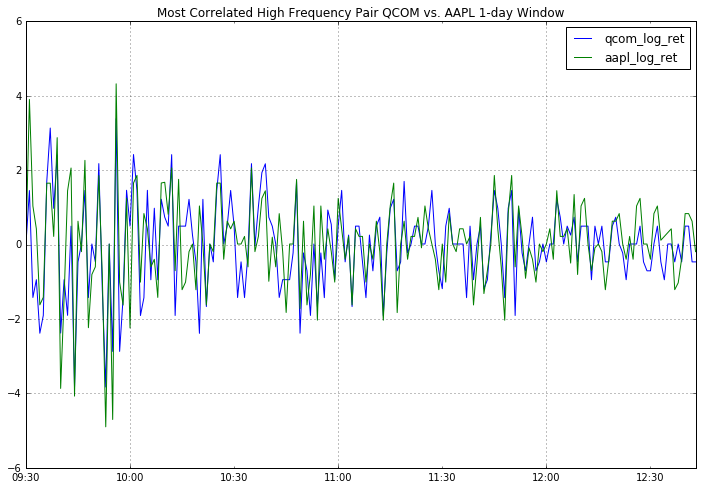

In [24]:
%matplotlib inline
import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (12.0, 8.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90
# df_upper = df[:len(df)/2]
# plt.title('Most Correlated High Frequency Pair QCOM vs. AAPL 1-day Window')
df_upper.plot(title='Most Correlated High Frequency Pair QCOM vs. AAPL 1-day Window')

In [27]:
# QCOM_log_ret   AAPL_log_ret     0.701826 on  20170407 65 seconds interval
date = '20170407'
pool = ['aapl', 'qcom']
start_time = '10:35am'
end_time = '12pm'
mtype = 'T'
group = 'directs'
align_by_sec_interval = 60
df = get_pool_data(pool, date, group, start_time, end_time, mtype, align_by_sec_interval)

Aligning by time interval: 60 seconds
getting data from: aapl
getting data from: qcom

merge complete.



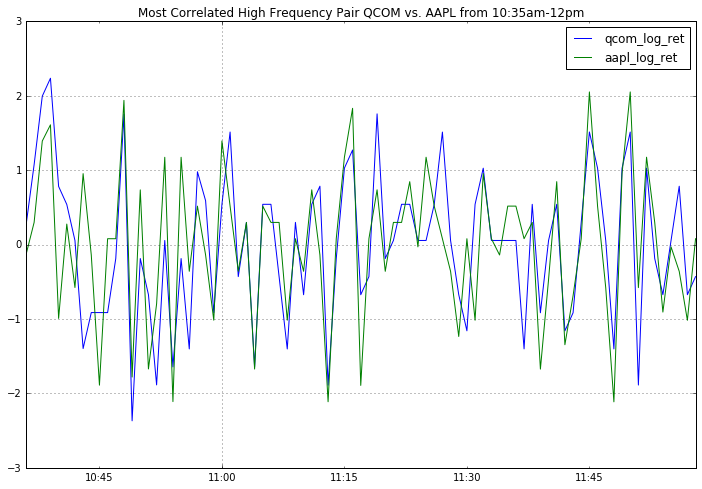

In [28]:
%matplotlib inline
import seaborn
seaborn.mpl.rcParams['figure.figsize'] = (12.0, 8.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90
# df_upper = df[:len(df)/2]
# plt.title('Most Correlated High Frequency Pair QCOM vs. AAPL 1-day Window')
df.plot(title='Most Correlated High Frequency Pair QCOM vs. AAPL from 10:35am-12pm')

In [53]:
# definition of all the functions used 

def get_ticker_data(date, group, ticker, start_time, end_time, mtype):
    """
    returns data from tickquery
    """
    try: 
        df = twx.tickquery(date, group, ticker, start_time, end_time, mtype)
    except:
        print "Ticker not found in the database!"
        return None
    return df
    

def align_time(df, align_by_sec_interval = 1):
    """
    this function takes in output from the following function call:
    
    df = twx.tickquery('20150102', 'directs', 'aapl', '3pm', '4pm', 'T')[['price']]
     
    takes in a dataframe formatted as [time, price], where the time column is the index
    returns a dataframe that aligns prices to each second interval
    assume that the input column name is ['price']

    """
    new_times = []
    new_price = []
    dates = df.index.tolist()
    prices = df['price'].values.tolist()
    ptr = 0
    start_time = pd.Timestamp(df.index.values[0].astype('<M8[m]'))
    end_time = pd.Timestamp(df.index.values[-1].astype('<M8[m]'))
    l = pd.Timedelta(end_time - start_time).seconds/align_by_sec_interval
#     if len(df) < l:
#         print "Warning ! the length of this ticker is less than length of the time interval.\n"
    for idx in range(l):   
        curr_time = start_time + pd.Timedelta(seconds=align_by_sec_interval) * idx
        new_times.append(curr_time)
        while ptr < len(prices) and dates[ptr] < curr_time:
            # pointer that points to the last element before it reaches the end of that second
            ptr += 1
        # when it exits the while loop - dates[ptr] is now greater than or equal to curr second
        # step back one step to make sure it is before end of current second interval 
        if ptr >= 1:
            new_price.append(prices[ptr - 1])
        else:
            # ptr == 0
            new_price.append(prices[0])
    columns = df.columns.tolist()
    assert len(columns) == 1
    new_df = pd.DataFrame(index = new_times, columns = columns)
    new_df[columns[0]] = new_price
    return new_df


def get_pool_data(pools, date, group, start_time, end_time, mtype, align_by_sec_interval = 1):
    """
    this funtion takes in a list of tickers that we want to pull data from
    and aligns the data using align_time function defined above so that price of each second interval
    is extracted and aligned across different ticker
    
    params example:
    pools = ['aapl', 'googl', 'msft']
    date = '20150102'
    start_time = '9am'
    end_time = '4pm'
    mtype = 'T'
    group = 'directs'
    
    returns a dataframe that is the merged df of all ticker prices after proper time alignment and normalization
    
    returned df from this function can be fed directly into pca function to get most correlated pairs/eigenvalues
    """
    d = {}
    print "Aligning by time interval: %d seconds" % align_by_sec_interval
    for idx, ticker in enumerate(pools):
        print 'getting data from:', ticker
        tmp = get_ticker_data(date, group, ticker, start_time, end_time, mtype)
        if tmp is None: continue
        tmp = tmp[['price']]
        tmp = align_time(tmp, align_by_sec_interval)
        # convert to log return
        tmp['price'] = np.log(tmp.price).diff()
        # careful that now the first entry is NAN value
        tmp = tmp.dropna()
        tmp = tmp.rename(columns={'price': ticker + '_log_ret'})
        d[ticker] = tmp
        
        if idx == 0: 
            df = d[ticker]
        else:
            # merge current dataframe with existing large dataframe to df
            df = pd.merge(d[ticker], df, left_index=True, right_index=True)
    print "\nmerge complete.\n"
    df=(df - df.mean())/df.std()
    return df

    
def pca(df, output_pairs = True, thre = 0.65):
    """
    thre - amount of contribution of eigenvalues to be output
    
    input data dimension N x D where N is number of tickers and D is sample size per ticker
    at this point the index of datetime doesnt matter anymore since prices are already aligned 
    can simply take in price lists and compute correlation matrix and etc.
    
    if pairs is true, returns the pair of tickers that have the highest correlation
    if pairs is false, returns the sorted eigenvectors and their eigenvalues
    
    if pairs is false - the funtion outputs the significant eigenvalues and eigenvectors
    it outputs eigenvectors up to those that contribute to thre of significance
    
    """
    
    m = df.as_matrix()
    D, N = m.shape
    if D == 0:
        print 'dataframe is empty'
        if output_pairs:
            return [0,0]
        else:
            return 0
    
    df_cor = df.corr().abs()
    flat = df_cor.unstack()
    cor_ordered = flat.order(kind="quicksort")
    
    if output_pairs:
        max_cor = cor_ordered[-(N+1):-N]    
        return max_cor
#         return cor_ordered
    else:
        cor = np.corrcoef(m.T)
        assert cor.shape == (N,N)
        eig_val, eig_vec = LA.eig(cor)  
        # the column vec[:,i] is the eigenvector corresponding to the eigenvalue val[i].
        # sort the eigenvector w.r.t its eigenvalues
        ev_list = zip(eig_val, eig_vec.T)
        ev_list.sort(key=lambda tup:tup[0], reverse = True)
        eig_val, eig_vec = zip(*ev_list)
        
        tmp = 0.
        idx = 0
        while idx < len(eig_val) and tmp/sum(eig_val) < thre:
            tmp += eig_val[idx]
            idx += 1
            
        print 'length of extracted eigenvectors is:', idx
       
        return ev_list[:idx], df.columns.tolist()

    
def get_tech_tickers(filename = 'companylist.csv', top_n = 100):
    """
    this function retrieves top 100 marketcap tech sector tickers from a csv file and returns a list of tickers
    """
    l = pd.read_csv(filename)
    tech = l[l['Sector'] == 'Technology']
    tech = tech.sort(['MarketCap'], ascending=[0])[:top_n]
    return tech['Symbol'].values.tolist()


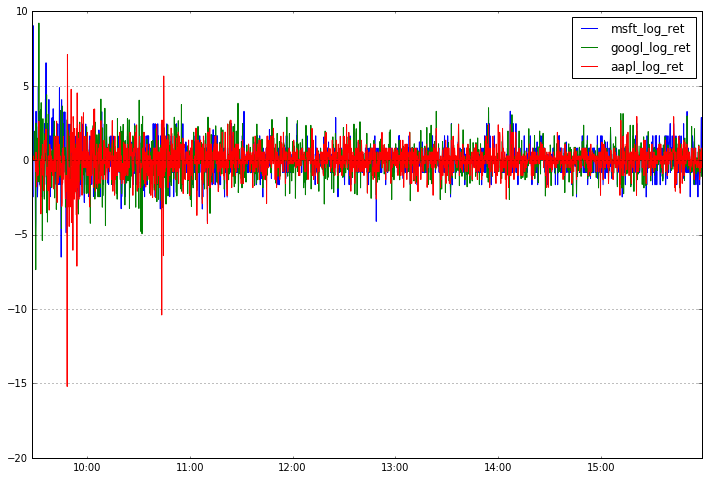

In [137]:
# optional - if want to visualize the aligned normalized log return from different tickers - 
# uncomment the following and run - adjust the size if needed

# %matplotlib inline
# import seaborn
# seaborn.mpl.rcParams['figure.figsize'] = (12.0, 8.0)
# seaborn.mpl.rcParams['savefig.dpi'] = 90
# df.plot()

In [111]:
# # this cell checks if a specific date is working 


# date = '20170506'
# # '20170410','20170411','20170412'
# df = twx.tickquery(date, 'directs', 'aapl', '3pm', '4pm', 'T')[['price']]
# df.head()

In [252]:
# this cell shows the head of the companylist.csv file that is sorted by market cap

l = pd.read_csv('./companylist.csv')
tech = l[l['Sector'] == 'Technology']
tech = tech.sort(['MarketCap'], ascending=[0])[:100]
# print 'retrived a total of %d tech tickers ' %len(tech_tickers)
tech.head()

,Symbol,Name,LastSale,MarketCap,ADR TSO,IPOyear,Sector,Industry,Summary Quote,Unnamed: 9
196,AAPL,Apple Inc.,188.36,9.258154e+11,n/a,1980,Technology,Computer Manufacturing,https://www.nasdaq.com/symbol/aapl,NaN
1984,MSFT,Microsoft Corporation,98.66,7.580243e+11,n/a,1986,Technology,Computer Software: Prepackaged Software,https://www.nasdaq.com/symbol/msft,NaN
123,GOOGL,Alphabet Inc.,1086.23,7.544397e+11,n/a,n/a,Technology,"Computer Software: Programming, Data Processing",https://www.nasdaq.com/symbol/googl,NaN
122,GOOG,Alphabet Inc.,1079.68,7.498904e+11,n/a,2004,Technology,"Computer Software: Programming, Data Processing",https://www.nasdaq.com/symbol/goog,NaN
1027,FB,"Facebook, Inc.",186.9,5.410059e+11,n/a,2012,Technology,"Computer Software: Programming, Data Processing",https://www.nasdaq.com/symbol/fb,NaN





pulling data on date:  20150102 with align time interval of:  30
Aligning by time interval: 30 seconds
getting data from: AAPL
getting data from: MSFT
getting data from: GOOGL
getting data from: FB
getting data from: INTC
getting data from: CSCO
getting data from: NVDA
getting data from: ADBE
getting data from: TXN
getting data from: AVGO
getting data from: QCOM
getting data from: MU
getting data from: BIDU
getting data from: AABA
Ticker not found in the database!
getting data from: ADP
getting data from: ATVI
getting data from: AMAT
getting data from: INTU
getting data from: CTSH
getting data from: EA
getting data from: NXPI
getting data from: ADI
getting data from: LRCX
getting data from: ADSK

merge complete.

length of extracted eigenvectors is: 23


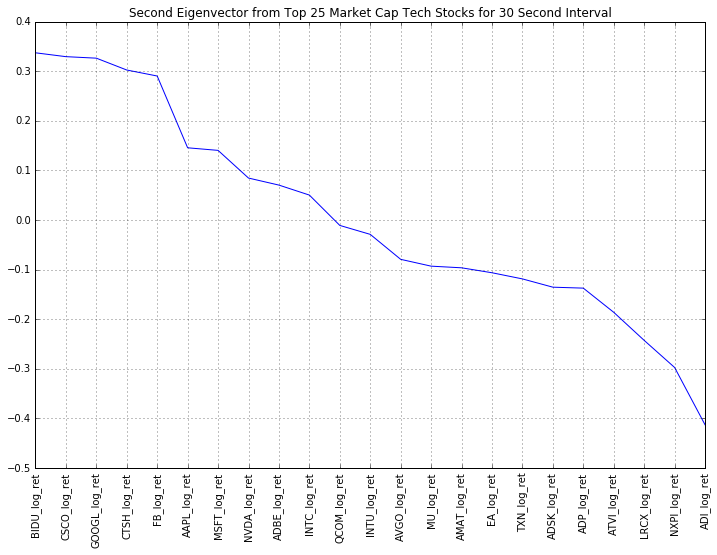

In [181]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
seaborn.mpl.rcParams['figure.figsize'] = (12.0, 8.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90

"""
this cell generates graphs for coefficients for first and second eigenvectors


"""

# define parameters for wrappers

top_n = 25 # top 30 market cap tech tickers to choose from
filename = './companylist.csv'
pools = get_tech_tickers(filename, top_n)
pools.remove('GOOG')
# dates = ['20150102','20170103','20170104']
dates = ['20150102']
start_time = '9am'
end_time = '4pm'
mtype = 'T'
group = 'directs'
# align_by_sec_interval_list = [1,5,10,20,30,60,120]
align_by_sec_interval_list = [30]
output_pairs = False
thre = 1
# which eigen vector to plot
num_eigenvec = 1 # 1= second eigen vector

# to use
if __name__ == '__main__':
    res = {}
    for date in dates:
        res[date] = {}
        for align_by_sec_interval in align_by_sec_interval_list:
            print '\n\n'
            print 'pulling data on date: ', date, 'with align time interval of: ', align_by_sec_interval
            df = get_pool_data(pools, date, group, start_time, end_time, mtype, align_by_sec_interval)
            eig_pair, x_axis_names = pca(df, output_pairs = output_pairs, thre = thre)
            res[date][align_by_sec_interval] = eig_pair
            (eig_val, eig_vec) = zip(*eig_pair)

            evec_list = zip(eig_vec[num_eigenvec], x_axis_names)
            evec_list.sort(key=lambda tup:tup[0], reverse = True)
            eig_vec_new, x_axis_names = zip(*evec_list)
           
            df = pd.DataFrame(columns = x_axis_names)
            df.loc[0] = eig_vec_new
                
            my_xticks = df.columns.tolist()
            x = np.array(range(len(my_xticks)))
            y = np.array(df.loc[0].values)
            plt.xticks(x, my_xticks, rotation='vertical')
            plt.grid(True)
            plt.title('Second Eigenvector from Top 25 Market Cap Tech Stocks for 30 Second Interval')
            plt.plot(x, y)
            plt.show()
            




pulling data on date:  20150102 with align time interval of:  10
Aligning by time interval: 10 seconds
getting data from: AAPL
getting data from: MSFT
getting data from: GOOGL
getting data from: FB
getting data from: INTC
getting data from: CSCO
getting data from: NVDA
getting data from: ADBE
getting data from: TXN
getting data from: AVGO
getting data from: QCOM
getting data from: MU
getting data from: BIDU
getting data from: AABA
Ticker not found in the database!
getting data from: ADP
getting data from: ATVI
getting data from: AMAT
getting data from: INTU
getting data from: CTSH
getting data from: EA
getting data from: NXPI
getting data from: ADI
getting data from: LRCX
getting data from: ADSK

merge complete.

length of extracted eigenvectors is: 23


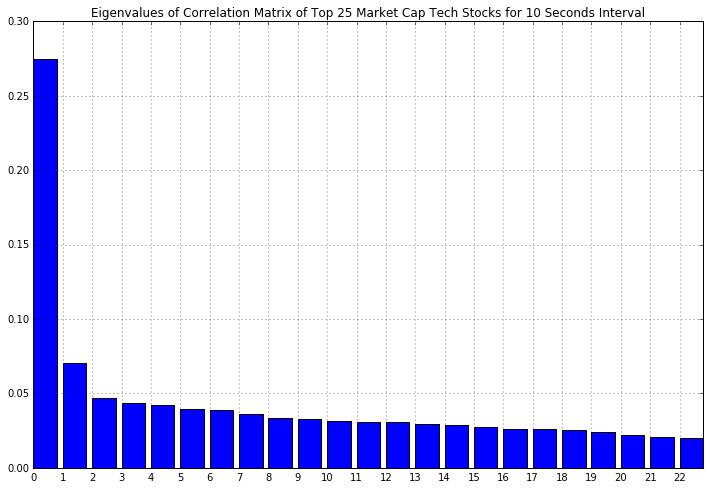

In [191]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
seaborn.mpl.rcParams['figure.figsize'] = (12.0, 8.0)
seaborn.mpl.rcParams['savefig.dpi'] = 90

"""
this cell generates graphs for eigenvalues for correlation matrix

"""

# define parameters for wrappers

top_n = 25 # top 30 market cap tech tickers to choose from
filename = './companylist.csv'
pools = get_tech_tickers(filename, top_n)
pools.remove('GOOG')
# dates = ['20150102','20170103','20170104']
dates = ['20150102']
start_time = '9am'
end_time = '4pm'
mtype = 'T'
group = 'directs'
# align_by_sec_interval_list = [1,5,10,20,30,60,120]
align_by_sec_interval_list = [10]
output_pairs = False
thre = 1
# which eigen vector to plot
num_eigenvec = 1 # 1= second eigen vector

# to use
if __name__ == '__main__':
    res = {}
    for date in dates:
        res[date] = {}
        for align_by_sec_interval in align_by_sec_interval_list:
            print '\n\n'
            print 'pulling data on date: ', date, 'with align time interval of: ', align_by_sec_interval
            df = get_pool_data(pools, date, group, start_time, end_time, mtype, align_by_sec_interval)
            eig_pair, x_axis_names = pca(df, output_pairs = output_pairs, thre = thre)
            res[date][align_by_sec_interval] = eig_pair
            (eig_val, eig_vec) = zip(*eig_pair)
    
            eig_val = eig_val/np.sum(eig_val) # convert to percentage
            x = np.array(range(len(eig_val)))
            y = np.array(eig_val)
            plt.xticks(x)
            plt.grid(True)
            plt.title('Eigenvalues of Correlation Matrix of Top 25 Market Cap Tech Stocks for 10 Seconds Interval')
            plt.bar(x, y)
            plt.show()
            

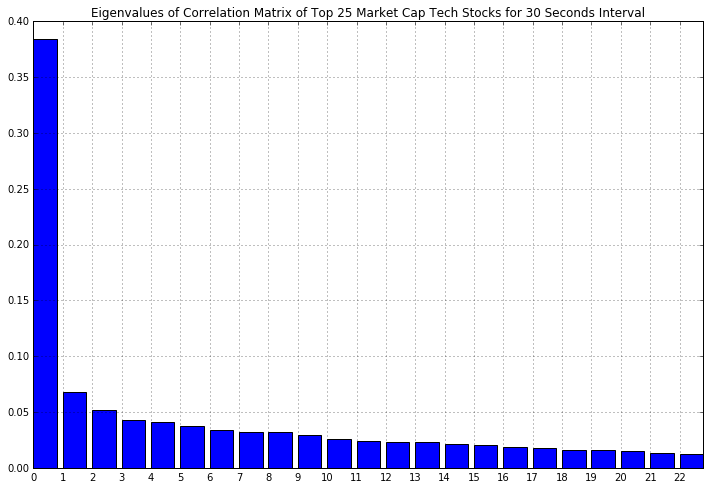

In [188]:
x = np.array(range(len(eig_val)))
y = np.array(eig_val)
plt.xticks(x)
plt.grid(True)
plt.title('Eigenvalues of Correlation Matrix of Top 25 Market Cap Tech Stocks for 30 Seconds Interval')
plt.bar(x, y)
plt.show()

In [ ]:
# meeting notes - graph on correlated price of a pairs
# a table on most correlated pairs by different time interval 
# 